In [1]:
import os
import numpy as np
import qcelemental as qcel
import apnet

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

# Example 1

### Create a Molecule object

In [2]:
# Construct a QCElemental Molecule (NMA/NMA dimer)
dimer = qcel.models.Molecule.from_data("""
0 1
C  1.936751  0.114698  0.005115
N  0.622706  0.682626 -0.016662
C -0.493895 -0.16594  -0.018994
O -0.348788 -1.386935  0.017646
C -1.82121   0.524456  0.019494
H  2.646755  0.911662  0.015937
H  2.11953  -0.520068  0.879318
H  2.098206 -0.514222 -0.887145
H  0.493025  1.657453 -0.008631
H -1.764239  1.629474 -0.010064
H -2.376644  0.229885 -0.878094
H -2.367904  0.197263  0.874817
--
0 1
O -1.013028 -1.757626  4.750031
C -0.216882 -1.495365  3.833027
N -0.306572 -2.062078  2.598756
C -1.335389 -3.009881  2.25671
C  0.964274 -0.552189  4.043937
H  0.403944 -1.838583  1.936019
H -1.974143 -2.622861  1.45626
H -1.958913 -3.103051  3.15382
H -0.960935 -3.961682  1.95552
H  1.580226 -0.92048   4.879495
H  1.574018 -0.442802  3.146404
H  0.548778  0.385676  4.33282
""")
dimer

NGLWidget()

### Use AP-Net to predict the SAPT0 interaction energy for the dimer

In [3]:
# predict SAPT0/aug-cc-pV(D+d)Z components using a pre-trained AP-Net model

sapt_prediction, sapt_uncertainty = apnet.predict_sapt(dimer)

# the prediction and uncertainty are both numpy arrays with shape (5,)
# [E_tot, E_elst, E_exch, E_ind, E_disp]

print("Predicted Interaction Energies:", sapt_prediction[0])
print("Prediction Uncertainties:      ", sapt_uncertainty[0])

Predicted Interaction Energies: [-3.53292365 -8.40987288 14.17680473 -2.42092042 -6.87893508]
Prediction Uncertainties:       [0.33328463 0.23905372 0.22711897 0.15038354 0.01420379]


### Or predict the individual atom-pair energies

In [4]:
# predict SAPT0/aug-cc-pV(D+d)Z components using a pre-trained AP-Net model

sapt_prediction, sapt_uncertainty = apnet.predict_sapt(dimer, return_pairs=True)

# the prediction and uncertainty are both numpy arrays with shape (5,)
# [E_tot, E_elst, E_exch, E_ind, E_disp]

print("Predicted Interaction Energies:", sapt_prediction[0].shape)
print("Prediction Uncertainties:      ", sapt_uncertainty[0].shape)

Predicted Interaction Energies: (5, 12, 12)
Prediction Uncertainties:       (5, 12, 12)


# Example 2

### Load 20 random validation dimers (and labels) from xyz files

In [5]:
# get a list of 20 BMS-formatted xyz files

xyz_dir = "/theoryfs2/ds/glick/apnet-demo/xyzs"
xyz_files = [f"{xyz_dir}/{xyz_file}" for xyz_file in os.listdir(xyz_dir) if xyz_file.endswith("xyz")][:20]

# load the BMS-formatted xyzs as QCElemental Molecules
# also load the SAPT0/aDZ labels

dimers = []
labels = []

for xyz_file in xyz_files:
    
    # dimer: molecular dimer                       (qcelemental Molecule)
    # label: true SAPT0/aDZ  interaction energy    (numpy array of shape (5,))
    dimer, label = apnet.load_bms_dimer(xyz_file)
    
    dimers.append(dimer)
    labels.append(label)

labels = np.array(labels)

# example of a file
print(open(xyz_files[0], "r").read())

34
CCCxdOXyOmY-1_macc-O1_c1cccxNc2ccccc2Xcc1_H-Naliph_20_1.42_131_61_124_-26_107,-1,-1,0,-2.3141484577750275,0.06552393670281002,0.02468410519969907,-1.9042585378848391,-0.5000979617926978,-2.314146900336295,0.06552393670281002,0.02468410519969907,-1.9042575211548105,-0.5000974210839936,-2.513312560258675,0.046781345734895084,0.02573613472370906,-1.9619941490713642,-0.6238358916459154,-2.513310988817883,0.046781345734895084,0.02573613472370906,-1.9619931640285633,-0.6238353052479236,10
C          0.232117         0.441630        -0.330872
C         -0.824223        -1.577887         0.955612
C         -0.040374        -0.258974         1.036383
O          0.935892         1.485036        -0.256013
O         -0.245415        -0.100642        -1.365406
H         -1.787509        -1.430365         0.453699
H         -0.275069        -2.353773         0.340976
H         -1.045290        -1.998037         1.943803
H          0.864695        -0.439407         1.527108
H         -0.614092    

# Visualize a few of the dimers

In [6]:
print(labels[0])
dimers[0]

[-2.51331256  0.04678135  0.02573613 -1.96199415 -0.62383589]


NGLWidget()

In [7]:
print(labels[1])
dimers[1]

[-5.94046404e-01 -2.17753634e-01  1.16469268e-04 -2.84927117e-01
 -9.14821215e-02]


NGLWidget()

In [8]:
print(labels[3])
dimers[3]

[ 1.12670089  3.22629123  0.47695294 -1.64178598 -0.93475731]


NGLWidget()

In [9]:
print(labels[7])
dimers[7]

[ 1.85706611 -5.37669447 23.11182888 -6.93103528 -8.94703302]


NGLWidget()

In [10]:
print(labels[16])
dimers[16]

[-7.77402918e+01 -7.67626695e+01  9.16591813e-05 -9.34049813e-01
 -4.36641190e-02]


NGLWidget()

In [11]:
print(labels[19])
dimers[19]

[-4.69327639 -2.0404647   0.12385666 -2.19046755 -0.5862008 ]


NGLWidget()

### Use AP-Net to predict SAPT0 interaction energies for all 20 dimers

In [12]:
# predict SAPT0 interaction energies for all 20 dimers
sapt_prds, sapt_stds = apnet.predict_sapt(dimers)

# errors and MAEs for each SAPT0 component
sapt_prds = np.stack(sapt_prds)
sapt_stds = np.stack(sapt_stds)
sapt_errs = sapt_prds - np.array(labels)
print("MAE:", np.average(np.abs(sapt_errs), axis=0))

MAE: [0.35204783 0.27273888 0.21344927 0.11000628 0.03349684]


### Plot the predictions (with uncertainties) vs the true interaction energies:

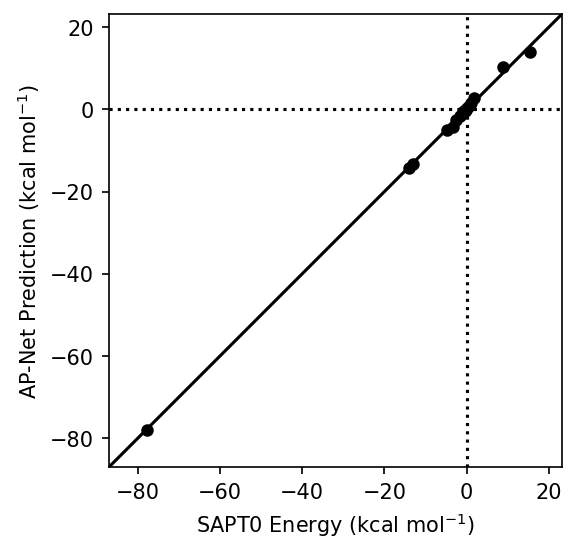

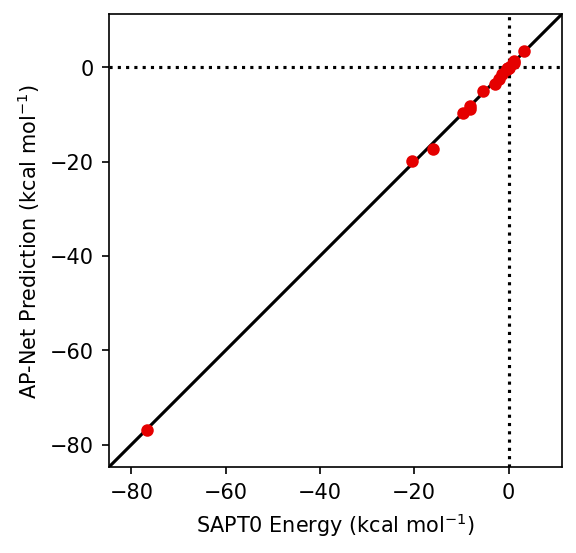

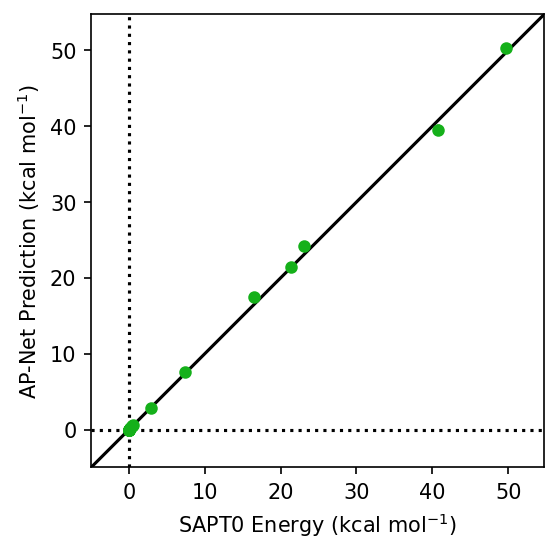

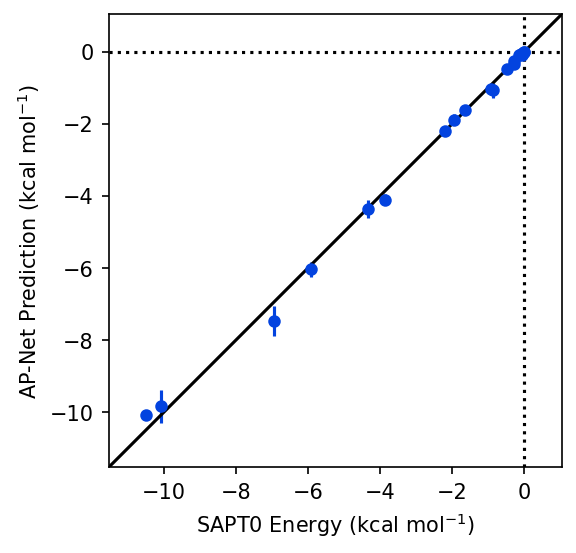

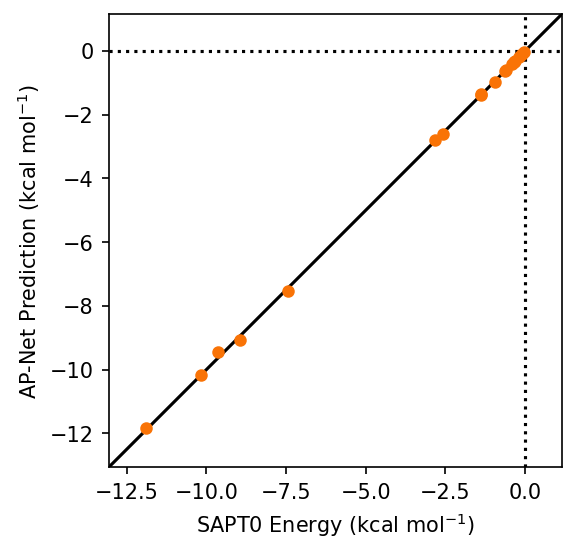

In [13]:
for i, color in enumerate(["k", "xkcd:red", "xkcd:green", "xkcd:blue", "xkcd:orange"]):
    e_min = min(np.min(labels[:,i]), np.min(sapt_prds[:,i]))
    e_max = min(np.max(labels[:,i]), np.max(sapt_prds[:,i]))
    de = e_max - e_min
    e_min -= de * 0.1
    e_max += de * 0.1
    
    #plt.scatter(labels[:,i], sapt_prds[:,i], color=color)
    plt.errorbar(x=labels[:,i], y=sapt_prds[:,i], yerr=sapt_stds[:,i], fmt='o', markersize=5.0, color=color)    
    plt.axis("square")
    plt.xlim(e_min, e_max)
    plt.ylim(e_min, e_max)
    plt.plot([e_min, e_max], [e_min, e_max], color='k')
    plt.axhline(y=0, ls=':', color='k')
    plt.axvline(x=0, ls=':', color='k')        
    plt.xlabel("SAPT0 Energy (kcal mol$^{-1}$)")
    plt.ylabel("AP-Net Prediction (kcal mol$^{-1}$)")
    plt.show()
    plt.close()

# Plot the prediction errors (with uncertainty) vs the true interaction energies:

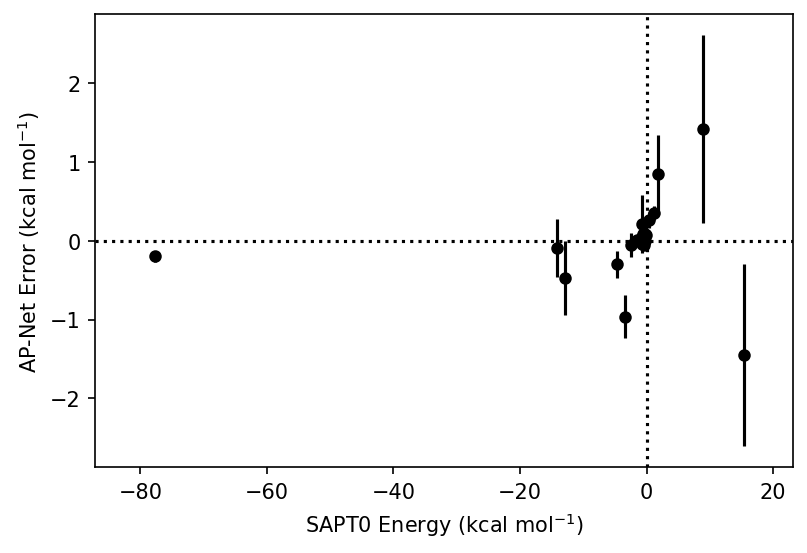

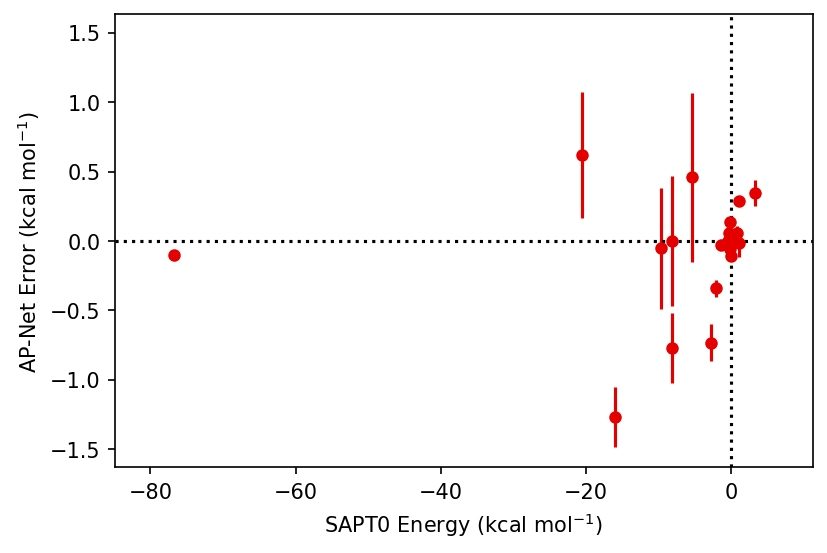

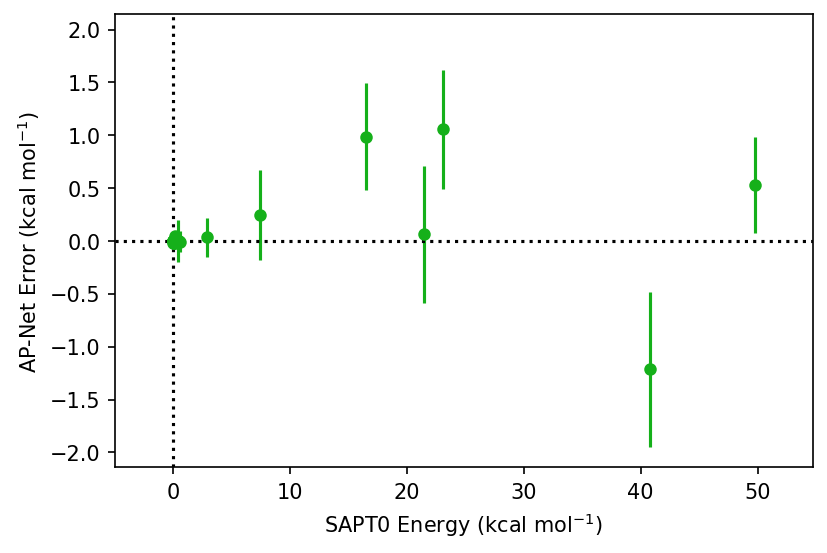

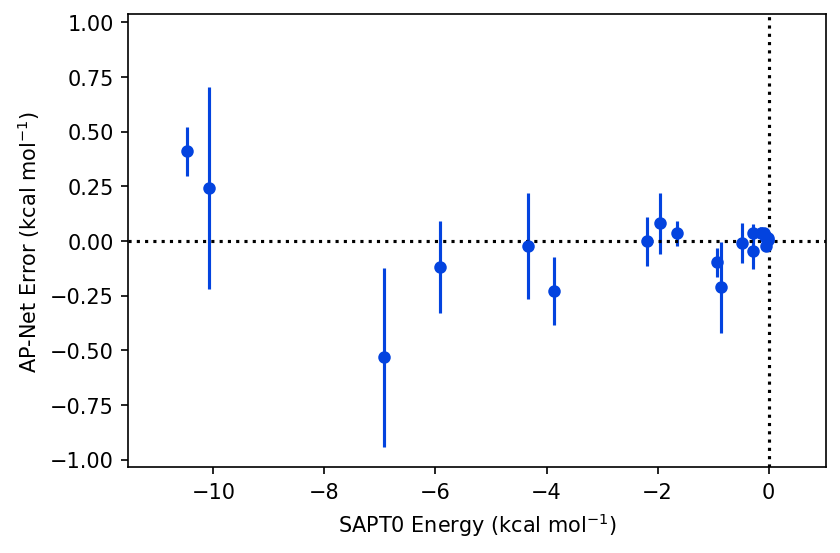

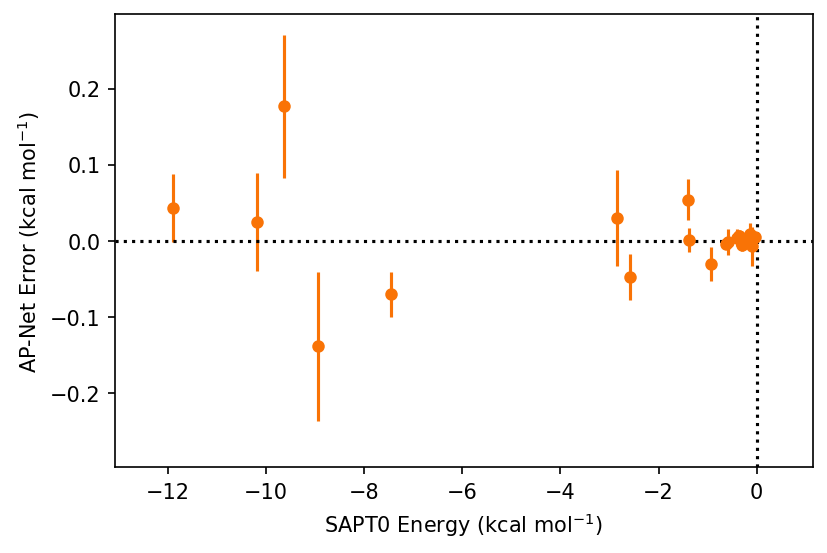

In [14]:
for i, color in enumerate(["k", "xkcd:red", "xkcd:green", "xkcd:blue", "xkcd:orange"]):
    e_min = min(np.min(labels[:,i]), np.min(sapt_prds[:,i]))
    e_max = min(np.max(labels[:,i]), np.max(sapt_prds[:,i]))
    de = e_max - e_min
    e_min -= de * 0.1
    e_max += de * 0.1
    
    err_min = np.min(sapt_prds[:,i] - labels[:,i] - sapt_stds[:,i])
    err_max = np.max(sapt_prds[:,i] - labels[:,i] + sapt_stds[:,i])
    err_abs = max(abs(err_max), abs(err_min)) * 1.1
    
    plt.errorbar(x=labels[:,i], y=(sapt_prds[:,i]-labels[:,i]), yerr=sapt_stds[:,i], fmt='o', markersize=5.0, color=color)    
    plt.axhline(y=0, color='k', ls=":")
    plt.axvline(x=0, color='k', ls=":")    
    plt.xlim(e_min, e_max)
    plt.ylim(-1.0 * err_abs, err_abs)
    plt.xlabel("SAPT0 Energy (kcal mol$^{-1}$)")
    plt.ylabel("AP-Net Error (kcal mol$^{-1}$)")
    plt.show()
    plt.close()